## Import metadata tsv for training and benchmark set

In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['figure.dpi'] = 100

sns.set(style = 'whitegrid')
training = pd.read_table('training_metadata_parsed.tsv')
benchmark = pd.read_table('benchmark_metadata_parsed.tsv')
#add a cat. feature named set which can assume the value (training/benchmark)
training['set'] = 'training'
benchmark['set'] = 'benchmark'
#concatenate training and benchmark in one df
df = pd.concat((training, benchmark),ignore_index=True)
df

,Entry,Signal peptide,Length,Organism,Taxonomic lineage,Sequence,set
0,P27889,NaN,558,Mus musculus (Mouse),Metazoa,MVSKLTSLQQELLSALLSSGVTKEVLIQALEELLPSPNFGVKLETL...,training
1,Q8LGU6,NaN,744,Arabidopsis thaliana (Mouse-ear cress),Viridiplantae,MEAMLVDCVNNSLRHFVYKNAIFMCERLCAEFPSEVNLQLLATSYL...,training
2,Q8IXM6,NaN,262,Homo sapiens (Human),Metazoa,MAPALLLIPAALASFILAFGTGVEFVRFTSLRPLLGGIPESGGPDA...,training
3,P56192,NaN,900,Homo sapiens (Human),Metazoa,MRLFVSDGVPGCLPVLAAAGRARGRAEVLISTVGPEDCVVPFLTRP...,training
4,P20676,NaN,1076,Saccharomyces cerevisiae (strain ATCC 204508 /...,Fungi,MSSNTSSVMSSPRVEKRSFSSTLKSFFTNPNKKRPSSKKVFSSNLS...,training
...,...,...,...,...,...,...,...
10611,P10257,24.0,137,Oncorhynchus keta (Chum salmon) (Salmo keta),Metazoa,MYCTHLMTLQLVVMAMLWVTPVRAGTECRYGCRLNNMTIIVEREDC...,benchmark
10612,Q56S59,23.0,150,Nicotiana tabacum (Common tobacco),Viridiplantae,MASAKIFLIFLLAALIATPAAFAILVPTLVSTHISGLVFCSVNGNL...,benchmark
10613,P28335,32.0,458,Homo sapiens (Human),Metazoa,MVNLRNAVHSFLVHLIGLLVWQSDISVSPVAAIVTDIFNTSDGGRF...,benchmark
10614,P10968,26.0,212,Triticum aestivum (Wheat),Viridiplantae,MKMMSTRALALGAAAVLAFAAATAQAQRCGEQGSNMECPNNLCCSQ...,benchmark


In [24]:
df.isna().sum()

Entry                   0
Signal peptide       9523
Length                  0
Organism                0
Taxonomic lineage       0
Sequence                0
set                     0
dtype: int64

## Compare the top10 Organism % by set

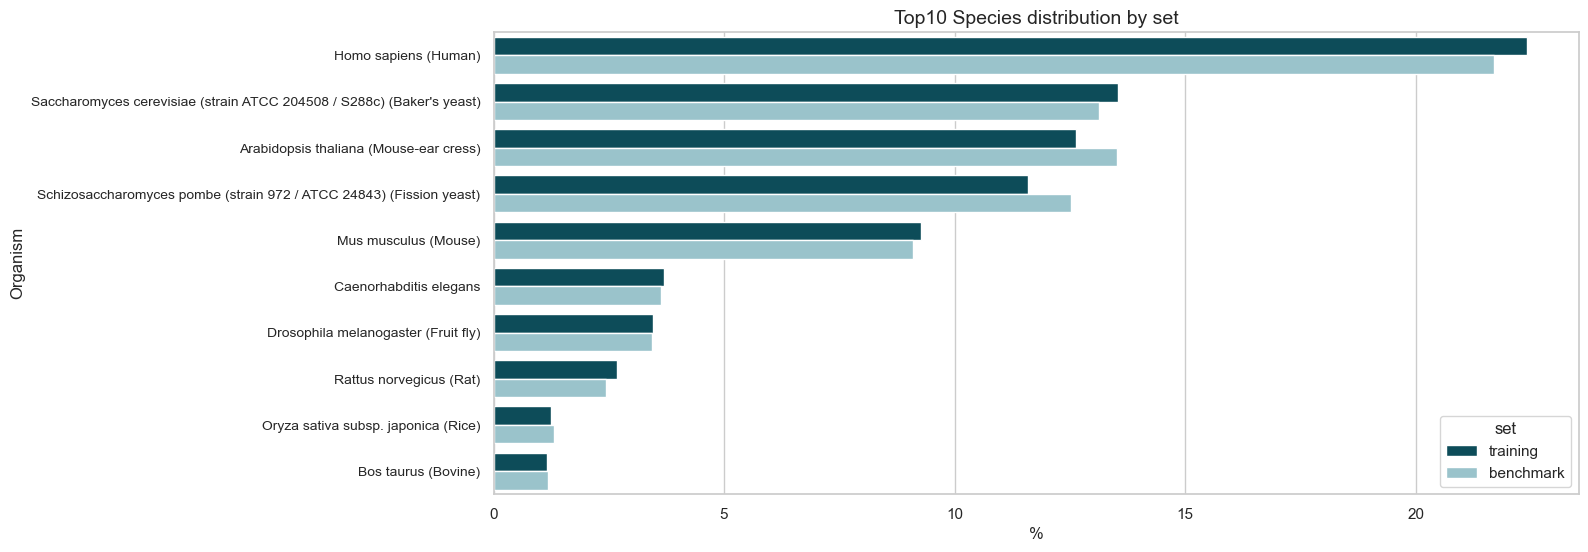

In [25]:
#training
top_training = training.groupby(['Organism']).size().reset_index(name='Count')
top_training = top_training.sort_values('Count', ascending=False)
top_training['%'] = top_training['Count']*100/top_training['Count'].sum()
top_training= top_training.head(10)
#benchmark
top_benchmark = benchmark.groupby(['Organism']).size().reset_index(name='Count')
top_benchmark = top_benchmark.sort_values('Count', ascending=False)
top_benchmark['%'] = top_benchmark['Count']*100/top_benchmark['Count'].sum()
top_benchmark=top_benchmark.head(10)
#top_df
top_training['set']= 'training'
top_benchmark['set'] = 'benchmark'
top_df = pd.concat((top_training, top_benchmark),ignore_index=True)

sns.barplot(data=top_df,x='%',y='Organism',width=0.8,hue='set',palette=['#005566','#92C8D3'])
plt.tick_params(axis='y', which='major', labelsize=10)
plt.title('Top10 Species distribution by set', fontsize=14)
plt.savefig('figures/top10species.svg', bbox_inches='tight')

## Compare kingdom % by set

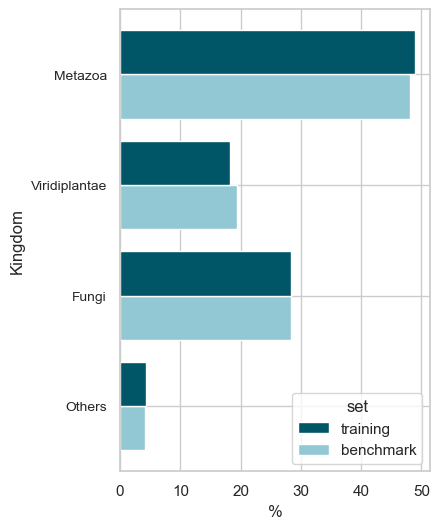

In [26]:


sns.set(rc={"figure.figsize":(4, 6)},style = 'whitegrid') 

sns.histplot(data=df, hue='set',y='Taxonomic lineage',shrink=0.8,common_norm=False,stat='percent',alpha = 1,multiple="dodge",palette=['#005566','#92C8D3'])
plt.tick_params(axis='y', which='major', labelsize=10)
plt.ylabel('Kingdom')

plt.xlabel('%')
plt.savefig('figures/kingdom.svg', bbox_inches='tight')


## Compare kingdom and top10 percentage by class

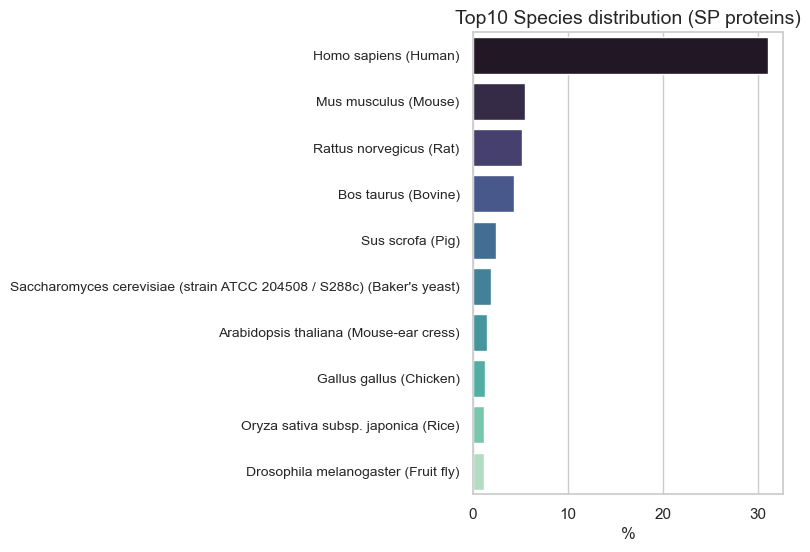

In [27]:
df['class'] = 'Non-SP'
df.loc[df['Signal peptide'].notna(), 'class'] = 'SP'
positives = df[df['Signal peptide'].notna()]
negatives = df[df['Signal peptide'].isna()]

#training
top_positives = positives.groupby(['Organism']).size().reset_index(name='Count')
top_positives = top_positives.sort_values('Count', ascending=False)
top_positives['%'] = top_positives['Count']*100/top_positives['Count'].sum()
top_positives= top_positives.head(10)
#benchmark
top_negatives = negatives.groupby(['Organism']).size().reset_index(name='Count')
top_negatives = top_negatives.sort_values('Count', ascending=False)
top_negatives['%'] = top_negatives['Count']*100/top_negatives['Count'].sum()
top_negatives=top_negatives.head(10)
#top_df
sns.barplot(data=top_positives,x='%',y='Organism',width=0.8,palette='mako')
plt.tick_params(axis='y', which='major', labelsize=10)
plt.title('Top10 Species distribution (SP proteins)', fontsize=14)
plt.ylabel('')

plt.savefig('figures/top10speciesSP.svg', bbox_inches='tight')

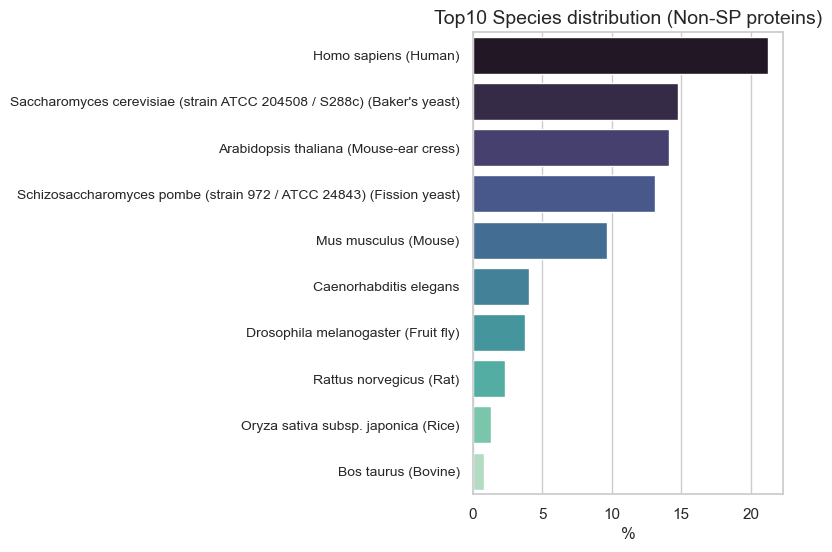

In [28]:
sns.barplot(data=top_negatives,x='%',y='Organism',width=0.8,palette='mako')
plt.tick_params(axis='y', which='major', labelsize=10)
plt.title('Top10 Species distribution (Non-SP proteins)', fontsize=14)
plt.ylabel('')

plt.savefig('figures/top10speciesnon-SP.svg', bbox_inches='tight')

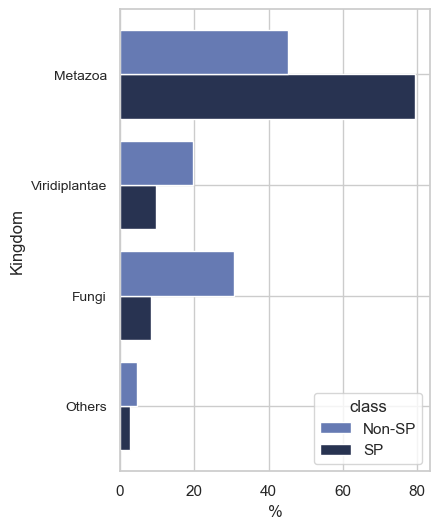

In [29]:
sns.set(rc={"figure.figsize":(4, 6)},style = 'whitegrid') 
sns.histplot(data=df, hue='class',y='Taxonomic lineage',palette=['#667AB3','#283351'],shrink=0.8,common_norm=False,stat='percent',alpha = 1,multiple="dodge")
plt.tick_params(axis='y', which='major', labelsize=10)
plt.xlabel('%')
plt.ylabel('Kingdom')

plt.savefig('figures/kingdom_byclass.svg', bbox_inches='tight')

## Compare SP length distribution by set

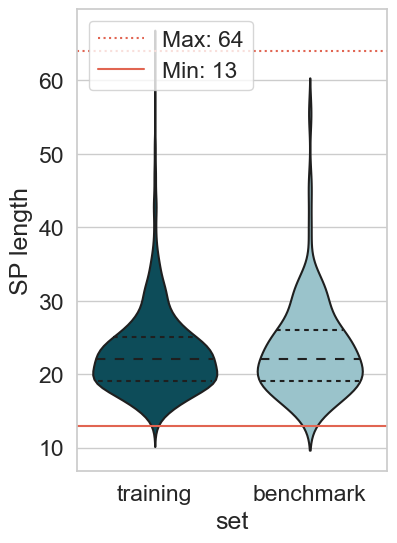

In [37]:

sns.set(rc={"figure.figsize":(4, 6)},style = 'whitegrid', font_scale=1.5) 

max_value = df['Signal peptide'].max()
min_value = df['Signal peptide'].min()
sns.violinplot(data=df, y="Signal peptide",x='set',inner='quartile',palette=['#005566','#92C8D3'])
plt.ylabel('SP length')
plt.axhline(y=max_value, color='#e16552',linestyle = "dotted", label=f'Max: {max_value:.0f}')
plt.axhline(y=min_value, color='#e16552', linestyle='solid', label=f'Min: {min_value:.0f}')
plt.legend(loc="upper left")
plt.savefig('figures/sp_len.svg', bbox_inches='tight')


In [ ]:
df['Signal peptide'].mean()

22.919487648673375

## Compare seq length (log) distribution by class (+/-) and set

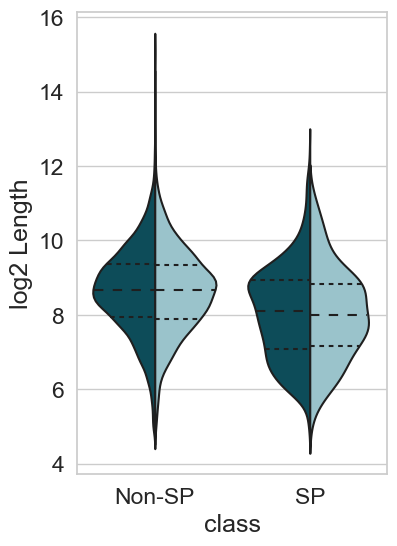

In [42]:
df['log2 Length']= np.log2(df['Length'])

sns.violinplot(data=df, y='log2 Length',x='class',hue='set',split=True, inner='quartile',palette=['#005566','#92C8D3'])
plt.legend([],[], frameon=False)

plt.savefig('figures/prot_len.svg', bbox_inches='tight')



## Compute the background aa freq distribution within all the eukaryoties in SwissProt

In [ ]:
euc_freq = {}
with open('sp_euc.fasta') as fasta:
    for line in fasta:
        if line[0] != '>':
            line = line.rstrip()
            for aa in line:
                if aa not in euc_freq.keys():
                    euc_freq[aa] = 1
                else:
                    euc_freq[aa] += 1

aa_to_remove = ['X','Z','U','B']
for key in aa_to_remove:
    euc_freq.pop(key)
#normalize the frequencies
factor=sum(euc_freq.values())/100
for k in euc_freq.keys():
    euc_freq[k] = euc_freq[k]/factor
print(euc_freq)


{'M': 2.294367689100498, 'R': 5.28659479524882, 'F': 4.061144192552833, 'Q': 4.243880060805525, 'V': 6.195116301658416, 'I': 5.2782038449558515, 'A': 6.964597776165187, 'T': 5.474762802434163, 'S': 8.167359184996902, 'Y': 2.9958458540998643, 'P': 5.352921291956602, 'G': 6.4210338295777225, 'D': 5.162172071912705, 'L': 9.66490107039764, 'N': 4.366213941365931, 'K': 5.957815728327312, 'E': 6.579050194696789, 'H': 2.411104159651493, 'W': 1.2401562853801333, 'C': 1.882758924715616}


In [ ]:
euc_freq = pd.DataFrame(euc_freq.items(),columns=['aa','%'])

#sorted_data = {k: round(v, 2) for k, v in sorted(euc_freq.items())}#

## Create a list of frequencies
#frequency_list = np.array(list(sorted_data.values()))#
#

#print(list(frequency_list/100))

## Compute the aa % within all the SP fragment (training and test separetely)(start-cleveage site)

In [ ]:
#TRAINING
#note that are present Z,U,X letters too
training_composition = {'Z' :0,'U' :0,'X' :0,'A': 0, 'Q': 0, 'L': 0, 'S': 0, 'R': 0, 'E': 0, 'K': 0, 'T': 0, 'N': 0, 'G': 0, 'M': 0, 'W': 0, 'D': 0, 'H': 0, 'F': 0, 'Y': 0, 'C': 0, 'I': 0, 'P': 0, 'V': 0}
for index, row in training.iterrows():
    if not pd.isna(row['Signal peptide']):
        for char in row["Sequence"][:int(row['Signal peptide'])]:
            training_composition[char] += 1
#remove strange aa
aa_to_remove = ['X','Z','U']
for key in aa_to_remove:
    training_composition.pop(key)
#normalize the frequencies
factor=sum(training_composition.values())/100
for k in training_composition.keys():
    training_composition[k] = training_composition[k]/factor
#TEST
#note that are present Z,U,X letters too
benchmark_composition = {'Z' :0,'U' :0,'X' :0,'A': 0, 'Q': 0, 'L': 0, 'S': 0, 'R': 0, 'E': 0, 'K': 0, 'T': 0, 'N': 0, 'G': 0, 'M': 0, 'W': 0, 'D': 0, 'H': 0, 'F': 0, 'Y': 0, 'C': 0, 'I': 0, 'P': 0, 'V': 0}
for index, row in benchmark.iterrows():
    if not pd.isna(row['Signal peptide']):
        for char in row["Sequence"][:int(row['Signal peptide'])]:
            benchmark_composition[char] += 1
#remove strange aa
aa_to_remove = ['X','Z','U']
for key in aa_to_remove:
    benchmark_composition.pop(key)
#normalize the frequencies
factor=sum(benchmark_composition.values())/100
for k in benchmark_composition.keys():
    benchmark_composition[k] = benchmark_composition[k]/factor

In [ ]:
amino_acid_groups = {
    'polar': ['S', 'T', 'N', 'Q', 'H','C'],
    'apolar': ['G', 'A', 'V', 'P', 'L', 'I', 'M'],
    'charged': [ 'D', 'E', 'K', 'R'],
    'aromatic': ['F', 'W', 'Y']}
aa_order = ['G','A','V','P','L','I','M','D','E','K','R','F','W','Y','S','T','C','N','Q','H']     
training_composition = pd.DataFrame(training_composition.items(),columns=['aa','%'])
benchmark_composition = pd.DataFrame(benchmark_composition.items(),columns=['aa','%'])
training_composition['set'] = 'training'
benchmark_composition['set'] = 'benchmark'
df_composition = pd.concat((training_composition, benchmark_composition),ignore_index=True)

euc_freq['group'] = euc_freq['aa'].apply(lambda x: next((group for group, aas in amino_acid_groups.items() if x in aas), None))
df_composition['group'] = df_composition['aa'].apply(lambda x: next((group for group, aas in amino_acid_groups.items() if x in aas), None))


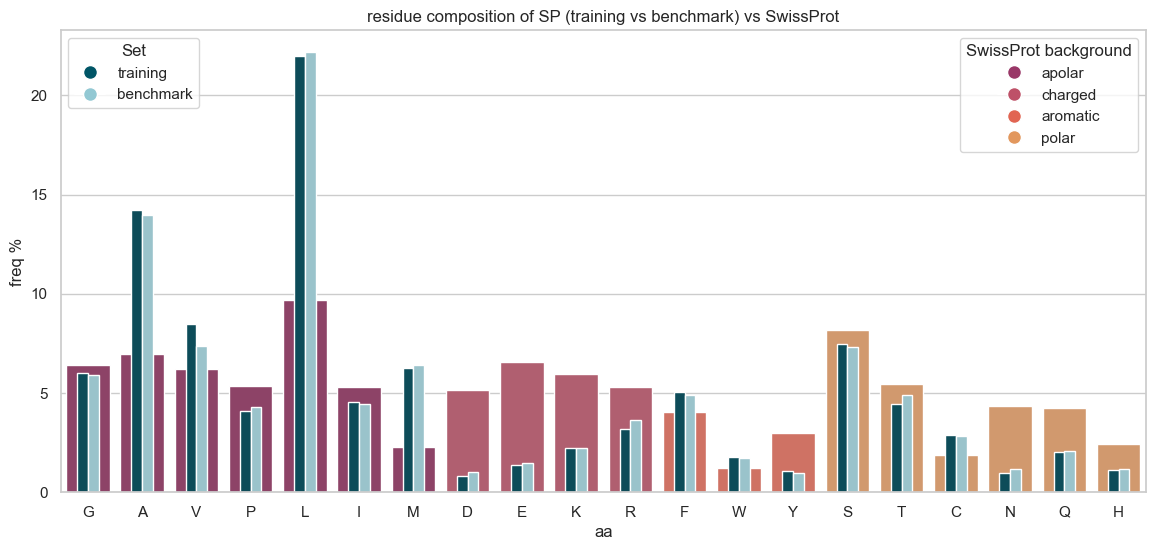

In [ ]:
sns.set(rc={"figure.figsize":(14, 6)},style = 'whitegrid') 
sns.barplot(data=euc_freq,x='aa',y='%',width=0.8,order=aa_order,hue='group',alpha=1,dodge=False,palette=["#993767","#be5168","#e16552","#e2975d","#e9d78e","#3b8d9c"])
sns.barplot(data=df_composition,x='aa',y='%',hue='set',width=0.4,order=aa_order,palette=['#005566','#92C8D3']).set(title='residue composition of SP (training vs benchmark) vs SwissProt', xlabel='aa', ylabel='freq %')
# Create custom legend handles for the first legend
handles1 = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10, label=label) for label, color in zip(euc_freq['group'].unique(), ["#993767", "#be5168", "#e16552", "#e2975d", "#e9d78e", "#3b8d9c"])]
# Create custom legend handles for the second legend
handles2 = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10, label=label) for label, color in zip(df_composition['set'].unique(), ['#005566', '#92C8D3'])]
# Create separate legends
legend1 = plt.legend(title="SwissProt background", handles=handles1, loc='upper right')
legend2 = plt.legend(title="Set", handles=handles2, loc='upper left')
# Add the legends to the plot
plt.gca().add_artist(legend1)
plt.savefig('figures/comp.svg', bbox_inches='tight')

## Compare positives and negatives global composition

In [ ]:
#positives
#note that are present Z,U,X letters too
positives_c_comp = {'Z' :0,'U' :0,'X' :0,'A': 0, 'Q': 0, 'L': 0, 'S': 0, 'R': 0, 'E': 0, 'K': 0, 'T': 0, 'N': 0, 'G': 0, 'M': 0, 'W': 0, 'D': 0, 'H': 0, 'F': 0, 'Y': 0, 'C': 0, 'I': 0, 'P': 0, 'V': 0}
for index, row in positives.iterrows():
    for char in row["Sequence"]:
        positives_c_comp[char] += 1
#remove strange aa
aa_to_remove = ['X','Z','U']
for key in aa_to_remove:
    positives_c_comp.pop(key)
#normalize the frequencies
factor=sum(positives_c_comp.values())/100
for k in positives_c_comp.keys():
    positives_c_comp[k] = positives_c_comp[k]/factor
#TEST
#note that are present Z,U,X letters too
negatives_c_comp = {'Z' :0,'U' :0,'X' :0,'A': 0, 'Q': 0, 'L': 0, 'S': 0, 'R': 0, 'E': 0, 'K': 0, 'T': 0, 'N': 0, 'G': 0, 'M': 0, 'W': 0, 'D': 0, 'H': 0, 'F': 0, 'Y': 0, 'C': 0, 'I': 0, 'P': 0, 'V': 0}
for index, row in negatives.iterrows():
    for char in row["Sequence"]:
        negatives_c_comp[char] += 1
#remove strange aa
aa_to_remove = ['X','Z','U']
for key in aa_to_remove:
    negatives_c_comp.pop(key)
#normalize the frequencies
factor=sum(negatives_c_comp.values())/100
for k in negatives_c_comp.keys():
    negatives_c_comp[k] = negatives_c_comp[k]/factor

In [ ]:
amino_acid_groups = {
    'polar': ['S', 'T', 'N', 'Q', 'H','C'],
    'apolar': ['G', 'A', 'V', 'P', 'L', 'I', 'M'],
    'charged': [ 'D', 'E', 'K', 'R'],
    'aromatic': ['F', 'W', 'Y']}
aa_order = ['G','A','V','P','L','I','M','D','E','K','R','F','W','Y','S','T','C','N','Q','H']     
positives_c_comp = pd.DataFrame(positives_c_comp.items(),columns=['aa','%'])
negatives_c_comp = pd.DataFrame(negatives_c_comp.items(),columns=['aa','%'])
positives_c_comp['set'] = 'SP'
negatives_c_comp['set'] = 'non-SP'
df_composition = pd.concat((positives_c_comp, negatives_c_comp),ignore_index=True)

euc_freq['group'] = euc_freq['aa'].apply(lambda x: next((group for group, aas in amino_acid_groups.items() if x in aas), None))
df_composition['group'] = df_composition['aa'].apply(lambda x: next((group for group, aas in amino_acid_groups.items() if x in aas), None))


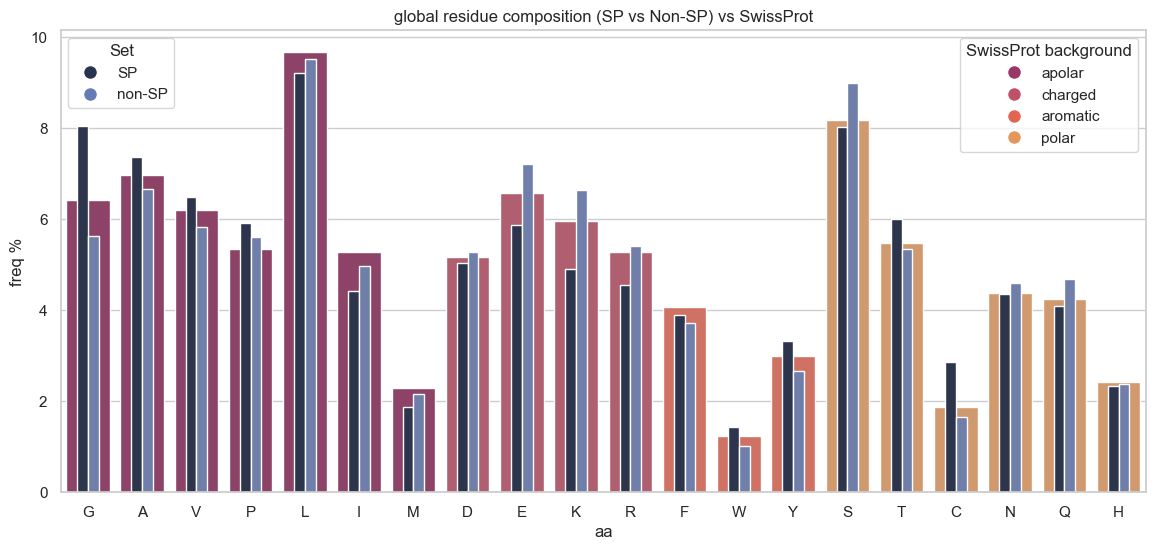

In [ ]:
sns.set(rc={"figure.figsize":(14, 6)},style = 'whitegrid') 
sns.barplot(data=euc_freq,x='aa',y='%',width=0.8,order=aa_order,hue='group',alpha=1,dodge=False,palette=["#993767","#be5168","#e16552","#e2975d","#e9d78e","#3b8d9c"])
sns.barplot(data=df_composition,x='aa',y='%',hue='set',width=0.4,order=aa_order,palette=['#283351','#667AB3']).set(title='global residue composition (SP vs Non-SP) vs SwissProt', xlabel='aa', ylabel='freq %')
# Create custom legend handles for the first legend
handles1 = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10, label=label) for label, color in zip(euc_freq['group'].unique(), ["#993767", "#be5168", "#e16552", "#e2975d", "#e9d78e", "#3b8d9c"])]
# Create custom legend handles for the second legend
handles2 = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10, label=label) for label, color in zip(df_composition['set'].unique(), ['#283351','#667AB3'])]
# Create separate legends
legend1 = plt.legend(title="SwissProt background", handles=handles1, loc='upper right')
legend2 = plt.legend(title="Set", handles=handles2, loc='upper left')
# Add the legends to the plot
plt.gca().add_artist(legend1)
plt.savefig('figures/c_comp.svg', bbox_inches='tight')

In [ ]:
# K, I, C, M, R, L, G, Y, N, D in top-28 PFI

In [ ]:
df_composition

,aa,%,set,group
0,A,7.373250,SP,apolar
1,Q,4.097856,SP,polar
2,L,9.204907,SP,apolar
3,S,8.031826,SP,polar
4,R,4.544522,SP,charged
5,E,5.867735,SP,charged
6,K,4.908662,SP,charged
7,T,6.010407,SP,polar
8,N,4.349397,SP,polar
9,G,8.047212,SP,apolar


## Generate an MSA of the SPs considering as position from -13 to +2 in respect to the cleaveage site

In [ ]:
#TRAINING
with open('training.msa','w') as file:
    for index, row in training.iterrows():
        if not pd.isna(row['Signal peptide']):
            i = int(row['Signal peptide'])
            file.write(row['Sequence'][i-13:i+2]+'\n')

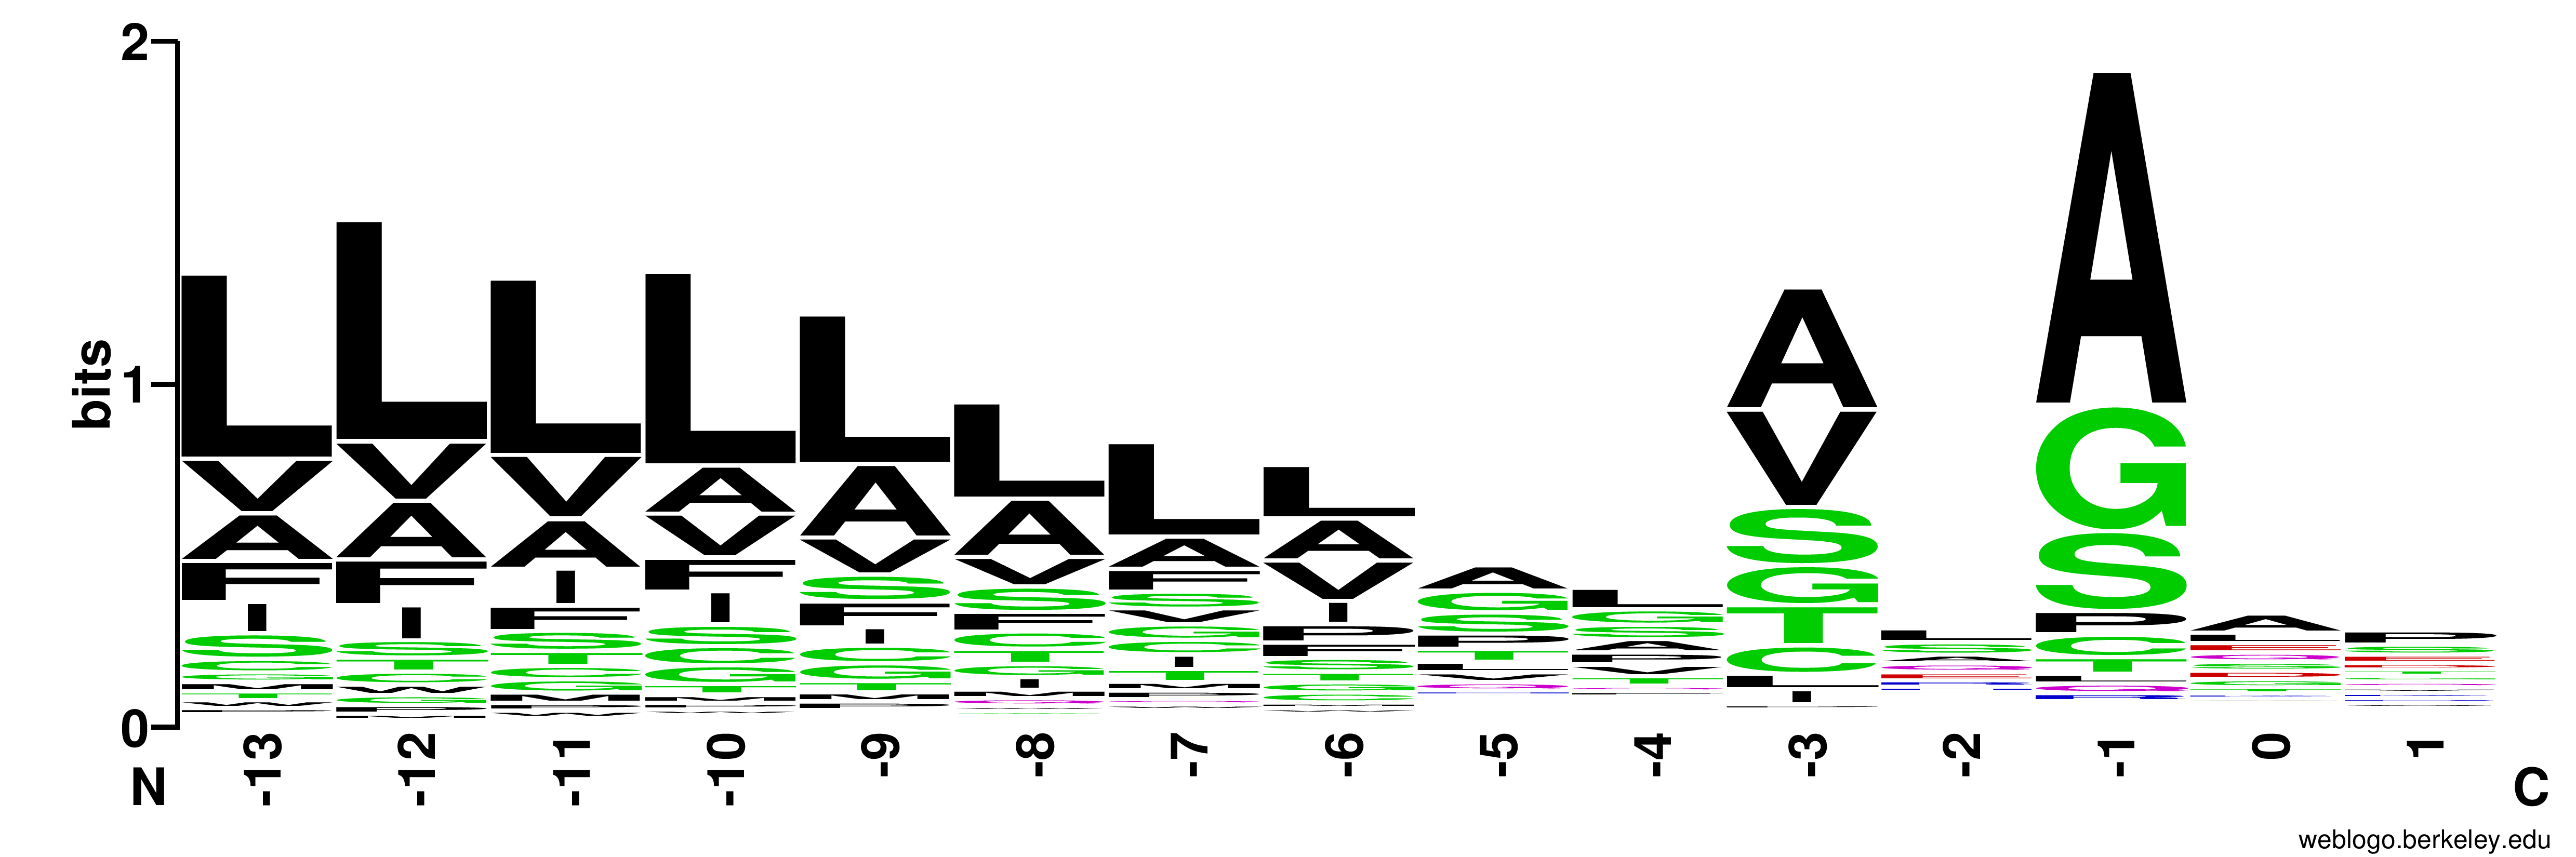

In [ ]:

#TEST
with open('benchmark.msa','w') as file:
    for index, row in benchmark.iterrows():
        if not pd.isna(row['Signal peptide']):
            i = int(row['Signal peptide'])
            file.write(row['Sequence'][i-13:i+2]+'\n')

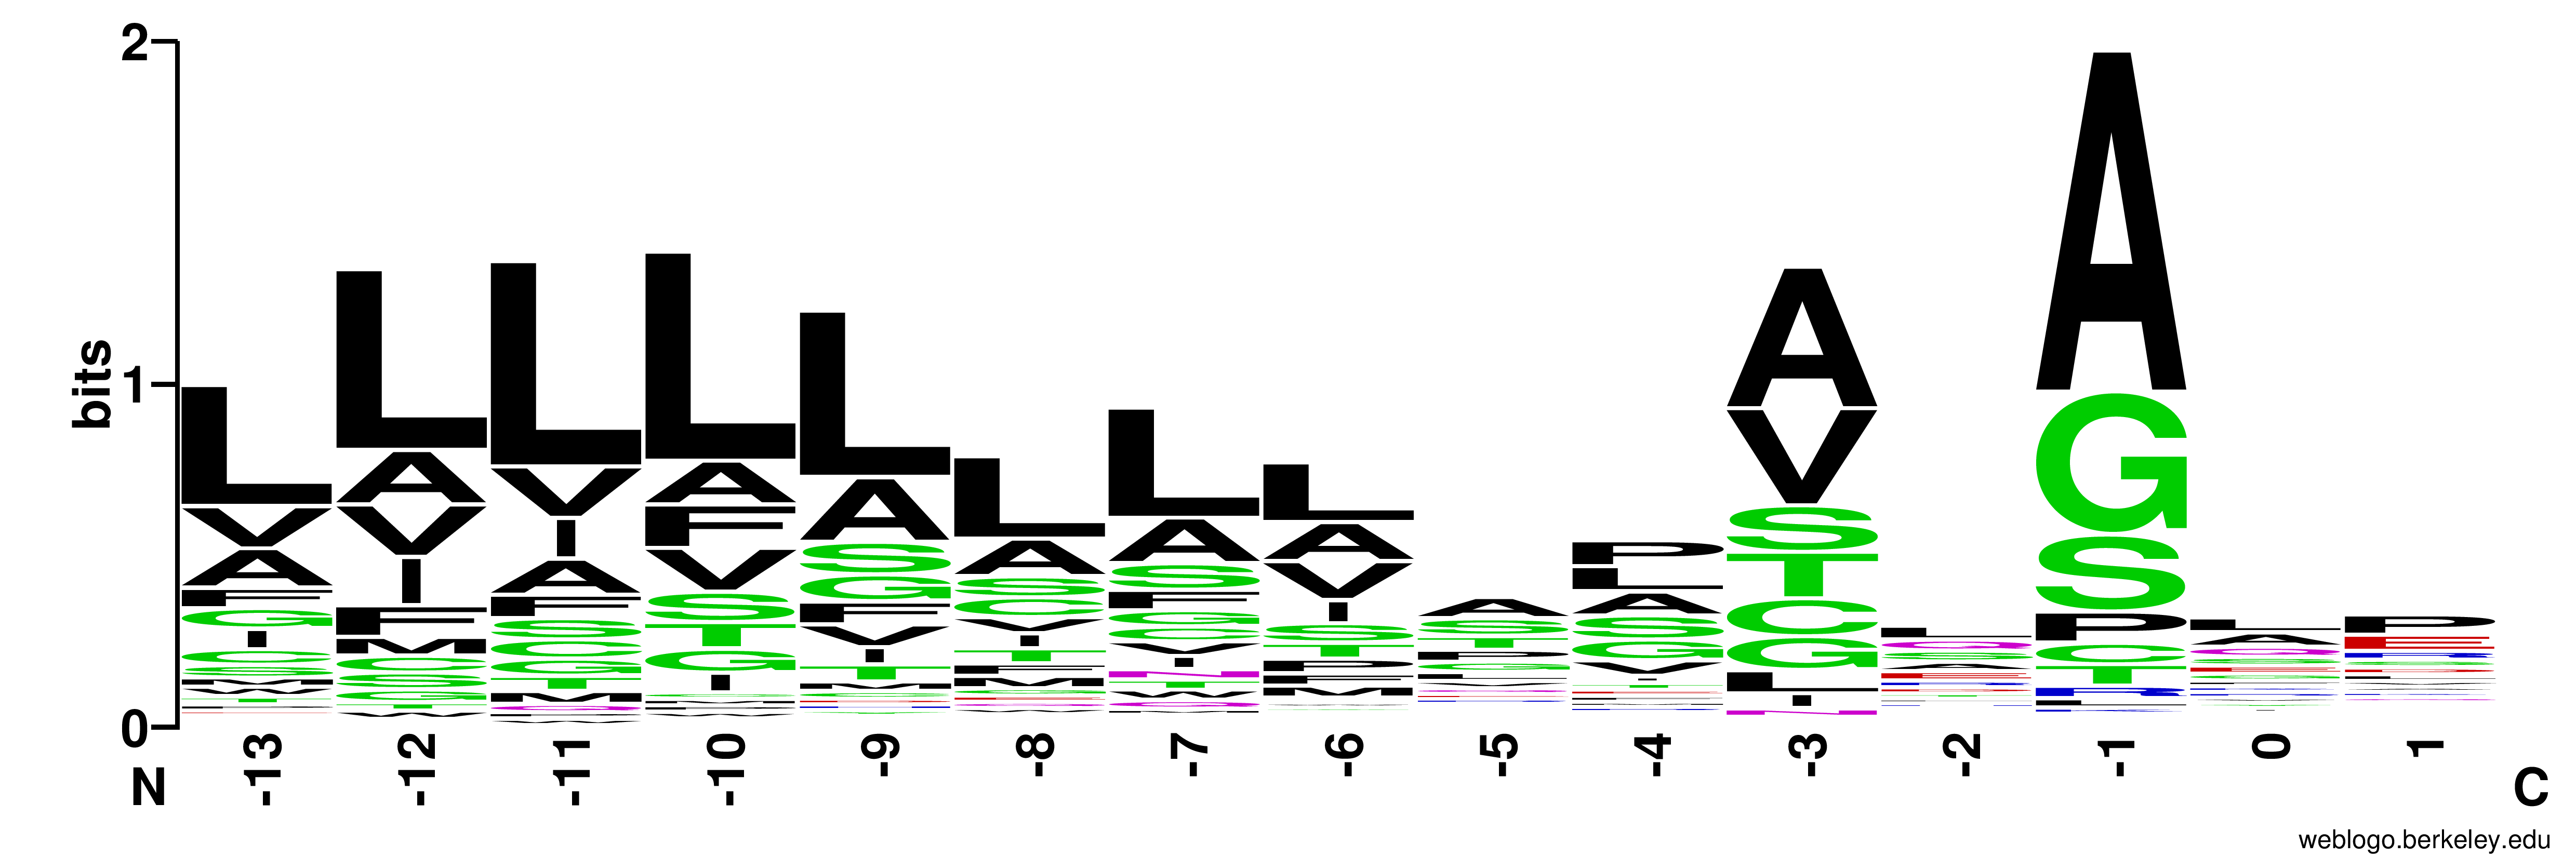